# Rakam Tanima CNN (Number Description CNN)
 MNIST

---


**Colab** için kimlik doğrulama adımları:

İslemlerin drive uzerinde kaydedilmesini istiyoruz

In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


### Kurulum ve Kontroller

**client bilgileri**

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3005539005443159266
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16003563240983909817
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

**Drive(client) üzerinde klasör listeleme:**

In [ ]:
import os
os.listdir('/gdrive/MyDrive/Dersler/Lisans/Veri_Madenciligi/')

['mnist_projesi', 'CTanima', 'spark', 'save_models']

**Drive da dosya konumlandırmayı yapma işlemleri**

In [ ]:
import os
os.chdir("/gdrive/MyDrive/Dersler/Lisans/Veri_Madenciligi/")

In [ ]:
!ls

CTanima  mnist_projesi	save_models  spark


**Yüklü değilse kütüphaneleri yüklemek için**

In [ ]:
!pip install -q keras
!pip install -q tensorflow

!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=f8453217ded6d01b3cd753394fb9e0d1e33463415f22d4bbe6fc92451c2d2c6d
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


### Uygulama Başlangıç

** gerekli kütüphaneleri import edelim **

*   print_function
*   keras
*   mnist
*   load_model
*   sequential
*   dense,dropout,flatten
*   conv2d
*   maxpooling2d
*   Liste öğesi
*   Liste öğesi






In [ ]:
from __future__ import print_function
import keras
import tensorflow
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras import backend as K

import matplotlib.pyplot as plt

**mnist kütüphanesi aracılığı ile veri setini eğitim ve test olarak yüklüyoruz**

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_test.shape

(10000, 28, 28)

(10000, 28, 28) -> 28e 28lik 10000 test görüntüsü var demek

### Veriden örnekleri görselleştirme

matplotlib kütüphanesinden yararlanıyoruz

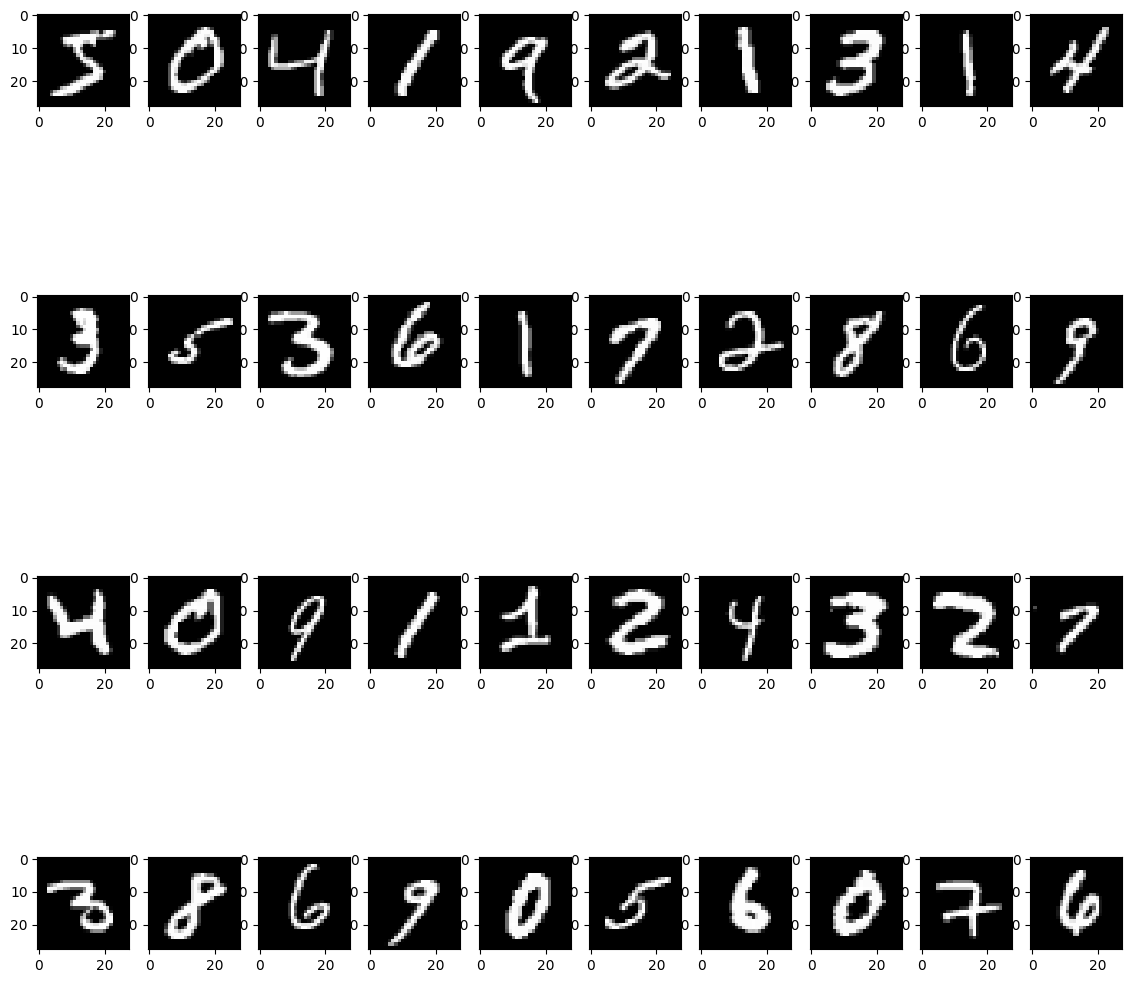

In [ ]:
plt.figure(figsize=(14,14))
x, y = 10, 4
for i in range(40):
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

**Görüntü boyutlarını düzenler**

In [ ]:
batch_size = 128
num_classes = 10
epochs = 6 # 12 epoch önerilir

img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
print(x_train.shape)

(60000, 28, 28, 1)


**çıkışları kategorize eder**

In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] burada OneHOt encoding uygulandı ve

veri çıkışı ikili etiketlendi 0-1

## MODEL OLUŞTURMA

The **sequential API** allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.  

Alternatively, the **functional API** allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. In fact, you can connect layers to (literally) any other layer. As a result, creating complex networks such as siamese networks and residual networks become possible.

In [ ]:
model = Sequential()

**Katmanların oluşturulması**

2 konvolüsyon katmanı

1 Max Pooling

1 Dropout

1 Flatten

1 Dense

1 Dropout

1 Dense  katmanı

Not: The filters argument sets the number of convolutional filters in that layer. These filters are initialized to small, random values, using the method specified by the kernel_initializer argument. During network training, the filters are updated in a way that minimizes the loss. So over the course of training, the filters will learn to detect certain features, like edges and textures, and they might become something like the image below

In [ ]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))


model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

Modell Görselleştirme


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

Bu çıktı, bir Keras modelinin (adı "sequential") katmanlarını ve her bir katmanın çıktı şeklini, parametre sayısını ve toplam parametre sayısını gösterir. Aşağıdaki bilgileri içerir:

- **Layer (type)**: Her katmanın türünü ve adını belirtir.
- **Output Shape**: Her katmanın çıktı şeklini gösterir. Örneğin, `(None, 26, 26, 32)` ifadesi, bir Conv2D katmanının çıktısının 3 boyutlu bir tensör olduğunu ve boyutlarının 26x26 piksel olduğunu ve 32 kanal olduğunu belirtir.
- **Param #**: Her katmandaki toplam öğrenilebilir parametre sayısını belirtir. Bu parametreler, ağırlıklar ve bias terimleridir. Örneğin, Conv2D katmanındaki parametre sayısı, filtrelerin sayısı, filtre boyutları ve giriş kanallarının sayısına bağlıdır.
- **Total params**: Toplam öğrenilebilir parametre sayısını gösterir. Bu, modelin toplam öğrenilebilir parametrelerinin sayısıdır.
- **Trainable params**: Eğitilebilir parametrelerin toplam sayısını belirtir. Bu, modelin eğitim sırasında güncellenen parametrelerdir.
- **Non-trainable params**: Eğitilemeyen parametrelerin sayısını belirtir. Bu, genellikle eğitilemeyen ağ katmanlarındaki sabit parametrelerdir.


**Modelin derleme parametrelerini belirliyoruz:**

loss: hangi kayıp fonksiyonu kullanılacağı seçilir. (mean_squared_error, categorical_crossentropy, binary_crossentropy vb.)

optimizer: optimizasyon algoritması seçimi (Stochastic Gradient Descent, Adadelta, Adam, vb.)

metrics: kullanılacak başarı metriği (accuracy, binary_accuracy,categorical_accuracy vb.)


In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = tensorflow.keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

### Eğitim İşlemleri

**Eğitim parametrelerini belirleriz:**

Batch_size: Batch sayısı modelin eğitilmesi aşamasında aynı anda kaç adet verinin işleneceği anlamına gelir. Varsayılan batch size=32'dir. yani 32 adet veri aynı anda eğitime girecek daha sonra optimizaston fonksiyonu ile hata oranı hesaplanacak ve sonraki 32 adet veriye geçecek. (Bu örnekte 128 seçilmiştir)

Epochs: epoch sayısı

verbose: ekranda progress bar ile bilgi gösterimini seçer

validation_data : validasyon verileri belirlenir

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/6
469/469 [==============================] - 14s 17ms/step - loss: 32.0985 - accuracy: 0.1480 - val_loss: 5.5807 - val_accuracy: 0.4224
Epoch 2/6
469/469 [==============================] - 7s 14ms/step - loss: 14.2235 - accuracy: 0.2597 - val_loss: 2.2173 - val_accuracy: 0.5769
Epoch 3/6
469/469 [==============================] - 6s 12ms/step - loss: 7.1403 - accuracy: 0.3298 - val_loss: 1.2983 - val_accuracy: 0.6009
Epoch 4/6
469/469 [==============================] - 4s 9ms/step - loss: 4.1565 - accuracy: 0.3481 - val_loss: 1.3148 - val_accuracy: 0.5506
Epoch 5/6
469/469 [==============================] - 4s 9ms/step - loss: 2.8373 - accuracy: 0.3416 - val_loss: 1.4619 - val_accuracy: 0.5001
Epoch 6/6
469/469 [==============================] - 5s 10ms/step - loss: 2.3234 - accuracy: 0.3474 - val_loss: 1.5379 - val_accuracy: 0.5212


Ağın kaydedilmesi

modelin yani ağırlıkların kaydedilmesi gerçekleştirilir.

In [ ]:
model.save('/gdrive/MyDrive/Dersler/Lisans/Veri_Madenciligi/mnist_projesi/mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Modelin test verileri ile değerlendirmesi yapılır.

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 1.5379352569580078
Test Accuracy: 0.5212000012397766


**Rastgele değer için test işlemi**

In [ ]:
model_test = model.save('save_models/mnist_model.h5')

In [ ]:
test_image = x_test[32]
y_test[32]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

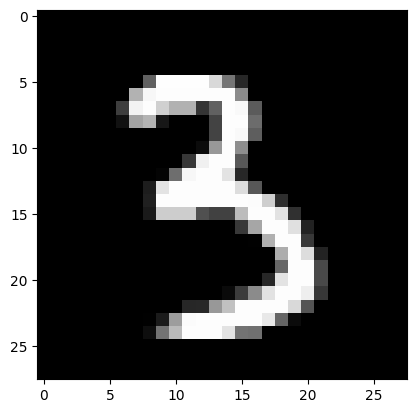

In [ ]:
plt.imshow(test_image.reshape(28,28), cmap='gray', vmin=2, vmax=255)

In [ ]:
model_test = load_model('save_models/mnist_model.h5')

In [ ]:
test_data = x_test[32].reshape(1,28,28,1)
pre = model_test.predict(test_data)

1/1 [==============================] - 0s 181ms/step


In [ ]:
pred = model_test.predict(test_data)


1/1 [==============================] - 0s 18ms/step


In [ ]:
import numpy as np
np.argmax(pred)

3